<a href="https://colab.research.google.com/github/ShinyQ/Tugas-Besar-Statistika_Credit-Card-Exploration_Data-Mining/blob/main/Kelompok1_IF43GAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Statistika**

**Anggota Kelompok :**
1. Hanvito Michael Lee      - 1301190090
2. Kurniadi Ahmad Wijaya    - 1301194024
3. Moh Naufal Mizan Saputro - 1301190015
4. Naufal Haritsah Luthfi   - 1301194073

>
>

**Library Yang Digunakan :**

1. Pandas, Sebagai Alat Bantu Statistik Dalam Pengolahan Data
2. Numpy, Sebagai Manipulator Array Pada Data
3. Seaborn, Sebagai Visualisasi Data Yang Telah Di Modelkan 
4. Matplotlib, Sebagai Library Tambahan Dalam Visualisasi Data 
4. Scikit, Sebagai Pengetesan Akurasi Data Yang Telah Di Modelkan

>
>

**Deskripsi Data :**

Data yang digunakan bersumber pada [https://www.kaggle.com/sakshigoyal7/credit-card-customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers) dimana tujuan data adalah untuk memprediksikan bagaimana sesorang kemungkinan akan meninggalkan penggunaan kartu kredit (churn) pada perusahaan.



## **Define Research Question**

Pada bagian ini kami mengelompokkan pertanyaan-pertanyaan yang akan kami jawab untuk diberikan ke manajer kartu kredit.

1. Apakah Terdapat Korelasi Antara Umur Dengan Jumlah Transaksi Yang Dilakukan Pengguna ?

2. Bagaimana Limit Kredit Yang Dimiliki Masing-Masing Jenis Kategori Kartu ?

3. Bagaimanakah Tingkat Edukasi Mempengaruhi Jenis Kartu Serta Pelanggan Yang Berhenti Berlangganan Kredit ?

4. Bagaimanakah tingkat transaksi yang dikeluarkan pengguna berdasarkan kategori kartu ?

5. Bagaimanakah Kategori Pemasukan Pengguna Mempengaruhi Jenis Kartu ?

6. Bagaimanakah Korelasi Antara Jumlah Transaksi Dan Jumlah Kredit Yang Dikeluarkan ?

7. Apakah Umur Mempengaruhi Jumlah Transaksi Kredit ?

8. Bagaimanakah Jenis Kartu Kredit Mempengaruhi Jumlah Transaksi Pengguna ?

9. Bagaimanakah Korelasi Umur Dengan Jumlah Total Transaksi Pengguna ?

10. Bagaimanakah Pengaruh Total Pengeluaran Terhadap Total Transaksi Pengguna ?

## **Collect And Organize Data**

In [ ]:
# Mengimport Library Yang Dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from scipy import stats

In [ ]:
# Memanggil File BankChurners.csv yang akan di processing 

def get_pdf():
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    url = "https://cdn.discordapp.com/attachments/781504776495038524/789899865962053632/BankChurners.csv"
    headers={'User-Agent':user_agent,} 
    
    request=urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    return response

# Membaca File CSV yang telah diimport
data_csv = get_pdf()
data = pd.read_csv(data_csv)

In [ ]:
# Menampilkan Sampel data random
data.sample(n = 5) 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
104,713572683,Existing Customer,44,M,3,High School,Unknown,$60K - $80K,Blue,25,3,3,0,1862.0,0,1862.0,0.883,1226,34,0.789,0.000,0.000067,0.999930
7714,718629858,Existing Customer,42,F,2,Uneducated,Married,Unknown,Blue,32,5,5,3,4708.0,0,4708.0,0.718,4597,89,0.679,0.000,0.000347,0.999650
7131,779166783,Existing Customer,41,F,4,Unknown,Single,$40K - $60K,Blue,31,5,1,2,2128.0,1383,745.0,0.679,3968,81,0.761,0.650,0.000063,0.999940
5692,713679633,Attrited Customer,41,F,3,Graduate,Married,Less than $40K,Blue,33,6,3,5,1438.3,0,1438.3,0.305,1813,51,0.759,0.000,0.998920,0.001078
8322,714825408,Existing Customer,45,F,3,High School,Single,$40K - $60K,Blue,36,2,3,3,2853.0,2517,336.0,0.595,4971,65,0.757,0.882,0.000305,0.999690


In [ ]:
# Mengecek Ukuran Data 
data.shape

(10127, 23)

## **Wrangle Data**

In [ ]:
# Menghapus Kolom Yang Tidak Digunakan
data_heatmap = data.drop([
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
          ], 
          axis=1)

In [ ]:
# Menghapus Kolom Yang Tidak Digunakan
data.drop([
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
           'Gender', 'Dependent_count', 'Marital_Status', 'Months_on_book', 
           'Total_Relationship_Count', 'Months_Inactive_12_mon', 'CLIENTNUM',
           'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
          ], 
          axis=1, inplace=True)

In [ ]:
# Mengecek Apakah Terdapat Data Kosong Pada Data
data.isnull().sum()

Attrition_Flag     0
Customer_Age       0
Education_Level    0
Income_Category    0
Card_Category      0
Credit_Limit       0
Total_Trans_Amt    0
Total_Trans_Ct     0
dtype: int64

**Kesimpulan:** Tidak Terdapat Data Kosong Pada Keseluruhan Value di Kolom

In [ ]:
# Mengecek Jenis Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  object 
 1   Customer_Age     10127 non-null  int64  
 2   Education_Level  10127 non-null  object 
 3   Income_Category  10127 non-null  object 
 4   Card_Category    10127 non-null  object 
 5   Credit_Limit     10127 non-null  float64
 6   Total_Trans_Amt  10127 non-null  int64  
 7   Total_Trans_Ct   10127 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 633.1+ KB


In [ ]:
# Mengecek Deskripsi Statistik Data
data.describe()

,Customer_Age,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,4404.086304,64.858695
std,8.016814,9088.776650,3397.129254,23.472570
min,26.000000,1438.300000,510.000000,10.000000
25%,41.000000,2555.000000,2155.500000,45.000000
50%,46.000000,4549.000000,3899.000000,67.000000
75%,52.000000,11067.500000,4741.000000,81.000000
max,73.000000,34516.000000,18484.000000,139.000000


In [ ]:
# Mengurangi Outlier Transaction Amount Untuk Card Category
Category = data
Category = Category.drop(['Attrition_Flag', 'Education_Level','Income_Category', 'Customer_Age','Credit_Limit','Total_Trans_Ct'], axis=1)

for x in range(5):
  Q1 = Category['Total_Trans_Amt'].quantile(0.25)
  Q3 = Category['Total_Trans_Amt'].quantile(0.75)
  IQR = Q3 - Q1

  BB = Q1 - (1.5 * IQR)
  BA = Q3 + (1.5 * IQR)

  Category = Category[~((Category['Total_Trans_Amt'] < BB) | (Category['Total_Trans_Amt'] > BA))]

In [ ]:
#Mengurangi Outlier Credit Limit Untuk Card Category
Category_Limit = data
Category_Limit = Category_Limit.drop(['Attrition_Flag', 'Education_Level','Income_Category', 'Customer_Age','Total_Trans_Amt','Total_Trans_Ct'], axis=1)

for x in range(17):
  Q1 = Category_Limit['Credit_Limit'].quantile(0.25)
  Q3 = Category_Limit['Credit_Limit'].quantile(0.75)
  IQR = Q3 - Q1

  BB = Q1 - (1.5 * IQR)
  BA = Q3 + (1.5 * IQR)

  Category_Limit = Category_Limit[~((Category_Limit['Credit_Limit'] < BB) | (Category_Limit['Credit_Limit'] > BA) & (Category_Limit['Card_Category'] != 'Platinum'))]

In [ ]:
# Modelling Total Amount By Card Category
Total_Count = []
Card_Count = data['Card_Category'].unique()

for n in Card_Count:
    Sum_Category = data.loc[(data['Card_Category']==n)]
    Total_Data_Category = len(Sum_Category)
    Total_Category = Sum_Category['Total_Trans_Ct'].sum()
    Total_Category = int(round(Total_Category/Total_Data_Category, 0))
    Total_Count.append(Total_Category)

In [ ]:
# Modelling Data Visualization

sns.set_theme(style="whitegrid")

def boxplot_transaction_amount_category():
    plt.figure(figsize=(8, 8))
    plt.title('Boxplot Kategori Kartu Dengan Jumlah Pengeluaran Kredit Transaksi', fontsize="14", pad=20)

    ax = sns.boxplot(data=Category, x='Total_Trans_Amt', y='Card_Category')
    ax.set(xlabel='Total Transaction Amount', ylabel='Card Category')
    plt.show()

def lineplot_transaction_count_age():
    plt.figure(figsize=(15, 5))
    plt.title('Lineplot Hubungan Total Transaksi Dengan Umur', fontsize="14", pad=20)

    ax = sns.lineplot(data=data, x="Customer_Age", y="Total_Trans_Ct", marker="o", palette="deep", ci=None)
    ax.set(xlabel='Customer Age', ylabel='Total Transaction Count')
    sns.set_context("notebook", rc={"lines.linewidth": 2.5})
    sns.set_style("whitegrid")

    plt.xticks(np.arange(25, max(data['Customer_Age'])+1, 5.0))
    plt.show()

def scatterplot_transaction_count_amount():
    plt.figure(figsize=(8, 8))
    plt.title('Scatterplot Total Transaksi Dengan Total Pengeluaran Kredit', fontsize="14", pad=20)

    ax = sns.scatterplot(data=data, x="Total_Trans_Amt", y = "Total_Trans_Ct")
    ax.set(xlabel='Total Transaction Amount', ylabel='Total Transaction Count')
    plt.show()

def histogram_transaction_amount_age():
    plt.figure(figsize=(10, 8))
    plt.title('Histogram Umur dengan Total Transaksi Kredit', fontsize="14", pad=20)

    ax = sns.histplot(data=data, x="Customer_Age",y='Total_Trans_Amt', bins=10,cbar=True)
    ax.set(xlabel='Customer Age', ylabel='Total Transaction Amount')

    plt.xticks(np.arange(min(data['Customer_Age'])-1, max(data['Customer_Age'])+1, 5.0))
    plt.yticks(np.arange(2500, max(data['Total_Trans_Amt'])+1, 1000.0))
    plt.show()

def scatterplot_transaction_amount_age():
    plt.figure(figsize=(8, 8))
    plt.title('Scatterplot Umur Dengan Total Transaksi Kredit', fontsize="14", pad=20)

    ax = sns.scatterplot(data=data, x="Customer_Age", y = "Total_Trans_Amt")
    ax.set(xlabel='Customer Age', ylabel='Total Transaction Amount')
    plt.show()

def boxplot_card_credit_limit():
    plt.figure(figsize=(14, 5))
    plt.title('Boxplot Kategori Kartu Dengan Credit Limit', fontsize="14", pad=20)

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(data=Category_Limit, x='Credit_Limit', y='Card_Category')
    ax.set(xlabel='Credit Limit', ylabel='Card Category')

    plt.xticks(np.arange(0, 35000, 2000.0))
    plt.show()

def barplot_education_attrition():
    plt.figure(figsize=(12,5))
    plt.title('Barplot Pengguna Kredit Berdasarkan Edukasi Dan Jenis Attrition', pad=20, fontsize=14)

    values_education =data['Education_Level'].value_counts().values
    ax = sns.countplot(x='Education_Level',hue='Attrition_Flag', data=data, order = data['Education_Level'].value_counts().index)
    ax.set(xlabel='Education Level', ylabel='Jumlah')
    plt.show()

def histogram_income_card_category():
    g = sns.FacetGrid(data, col="Card_Category", height=4)
    g.fig.suptitle('Histogram Card Category Berdasarkan Income Category', y=1.1)  
    g.map(sns.histplot, "Card_Category", "Income_Category", cbar=True)
    g.set(xticks=[])

def barplot_category_transaction_count():
    plt.figure(figsize=(8, 6))
    plt.title('Rata-Rata Total Transaction Count Berdasarkan Card Category')

    Card_Count_Bar = sns.barplot(x=Card_Count, y=Total_Count)

    for i, p in enumerate(Card_Count_Bar.patches):
        height = p.get_height()
        Card_Count_Bar.text(p.get_x()+p.get_width()/2., height + 0.5, Total_Count[i],ha="center")

    plt.show()

## **Explore, Visualize And Analyze Data**

**1. Lineplot Hubungan Total Transaksi dengan Umur Customer**

Tujuan dari visualisasi diagram garis antara total transaksi dengan umur customer adalah untuk mengetahui total transaksi yang dilakukan oleh user berdasarkan umur customer.

Dapat kita lihat pada diagram garis tersebut, sumbux merupakan umur pengguna dan sumbu y merupakan total transaction count pengguna. Dari diagram garis tersebut, disimpulkan bahwa semakin naiknya umur seorang pengguna, maka daya minat beli mereka akan semakin turun.

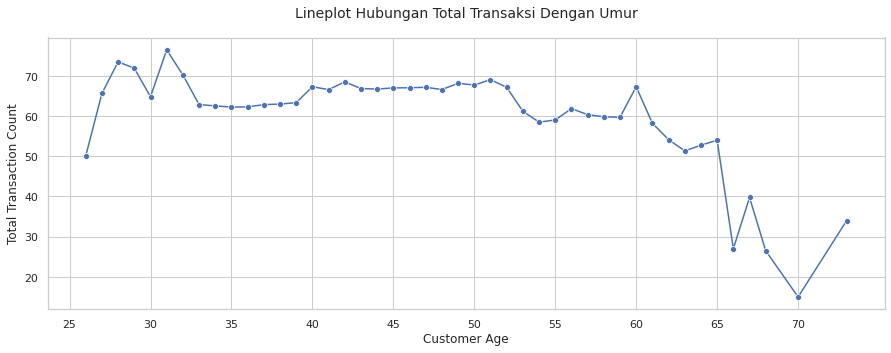

In [ ]:
lineplot_transaction_count_age()

**2. Boxplot Kategori Kartu Dengan Credit Limit**

Tujuan dari boxplot kategori kartu dengan credit limit adalah untuk mengetahui deskripsi data credit limit untuk kategori kartu tertentu.
<br>

**Metode**

Sebelum data dibersihkan, Card Category Platinum, Gold dan Blue memiliki pencilan, oleh karena itu kita perlu membersihkan data sehingga diperoleh boxplot seperti di bawah.
<br>

**Deskripsi Boxplot**

Dari keempat boxplot berdasarkan Card Category tersebut, dapat dilihat bahwa rata-rata Credit Limit yang paling besar yaitu terdapat pada kartu berjenis platinum. Dapat dilihat juga pada boxplot, bahwa rata-rata Credit Limit paling kecil adalah kartu berjenis Blue

Jenis kartu Blue memiliki outliers setelah nilai maksimumnya dan jenis kartu Platinum memiliki outliers di bawah nilai minimum, yang berarti bahwa terdapat total transaksi pengguna pada kartu berjenis Blue dan Platinum yang bernilai terlalu jauh dari credit limit pengguna lainnya.
<br>

**Boxplot Card Blue**

Distribusi data cenderung menjulur ke arah kanan yang berarti kemiringan dari distribusi data pada boxplot card blue bernilai positif.
<br>

**Boxplot Card Silver**

Distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card silver bernilai negatif.
<br>

**Boxplot Card Gold**

Distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card gold bernilai negatif.
<br>

**Boxplot Card Platinum**

Distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card Platinum bernilai negatif.


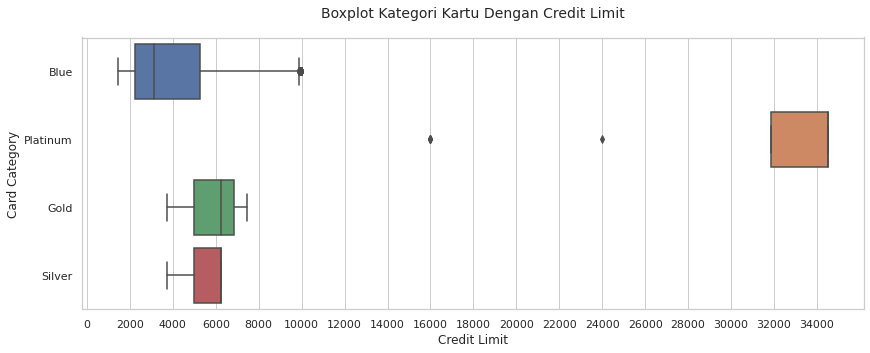

In [ ]:
boxplot_card_credit_limit()

**3. Barplot Pengguna Kredit Berdasarkan Edukasi Dan Jenis Attrition**

Dari diagram batang di bawah dapat disimpulkan bahwa 'Graduate' memiliki jumlah pengguna kredit aktif paling banyak dan memiliki jumlah pengguna kredit pasif/tidak aktif paling banyak.




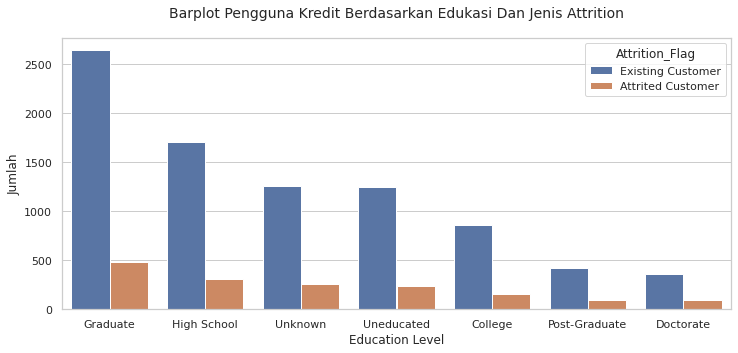

In [ ]:
barplot_education_attrition()

**4. Boxplot Kategori Kartu Dengan Jumlah Pengeluaran Kredit Transaksi**

Menjelaskan mengenai penggunaan suatu jenis kartu kredit tertentu dengan jumlah total transaksi pengguna. 

Dari keempat boxplot berdasarkan Card Category tersebut, dapat dilihat bahwa rata-rata pemakaian yang paling besar yaitu terdapat pada kartu berjenis platinum yang mana kartu jenis platinum merupakan kartu yang paling tinggi tingkatannya diantara jenis kartu yang lain. 

Jenis kartu blue dan silver kita lihat memiliki outliers setelah nilai maksimumnya, yang berarti bahwa terdapat total transaksi pengguna pada kartu berjenis blue dan silver yang bernilai terlalu jauh dari total transaksi pengguna lainnya. 

1. Boxplot Card Blue, distribusi data cenderung menjulur ke arah kanan yang berarti kemiringan dari distribusi data pada boxplot card blue bernilai positif

2. Boxplot Card Silver, distribusi data cenderung menjulur ke arah kanan yang berarti kemiringan dari distribusi data pada boxplot card silver bernilai positif

3. Boxplot Card Gold, distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card gold bernilai negatif

4. Boxplot Card Platinum, distribusi data cenderung simetris yang berarti kemiringan dari distribusi pada boxplot card platinum bernilai 0

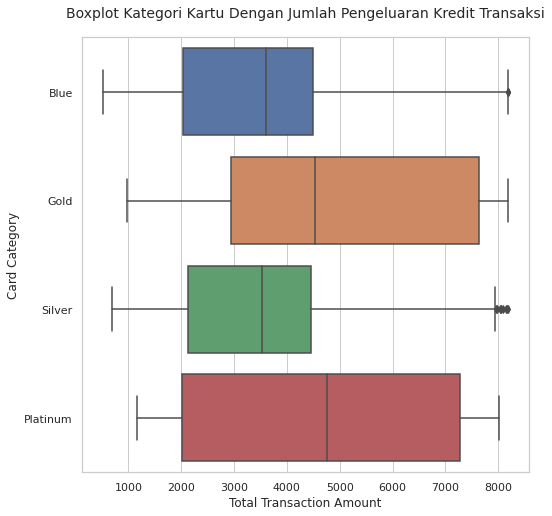

In [ ]:
boxplot_transaction_amount_category()

**5. Histogram Income Category Dan Card Category**

Tujuan dari visualisasi histogram antara pendapatan dengan kategori kartu adalah untuk mengetahui kategori kartu berdasarkan jumlah pendapatan user.

Dari keempat histogram tersebut, dapat dilihat bahwa jumlah pendapatan terbesar terdapat pada kategori kartu **Blue** dengan kategori pendapatan 'Unknown' sebanyak 3000

Pada histogram kategori kartu **Blue**, dapat disimpulkan bahwa:
1. Jumlah pendapatan terbesar pertama terdapat pada kategori pendapatan 'Unknown' sebanyak 3000
2. Jumlah pendapatan terbesar kedua terdapat pada kategori pendapatan '120K+' sebanyak 2500
3. Jumlah pendapatan terbesar ketiga terdapat pada kategori pendapatan '80K-120K' sebanyak 2000
4. Jumlah pendapatan terbesar keempat terdapat pada kategori pendapatan 'Less than 40K' sebanyak 2000
5. Jumlah pendapatan terbesar kelima terdapat pada kategori pendapatan '60K-80K' sebanyak 1000
6. Jumlah pendapatan terbesar keenam terdapat pada kategori pendapatan '40K-60K' sebanyak 500

Pada histogram kategori kartu **Gold**, dapat disimpulkan bahwa:
1. Jumlah pendapatan terbesar pertama terdapat pada kategori pendapatan 'Less than 40K' sebanyak 25
2. Jumlah pendapatan terbesar kedua terdapat pada kategori pendapatan 'Unknown' sebanyak 20
3. Jumlah pendapatan terbesar ketiga terdapat pada kategori pendapatan '120K+' sebanyak 18
4. Jumlah pendapatan terbesar keempat terdapat pada kategori pendapatan '80K-120K' sebanyak 15
5. Jumlah pendapatan terbesar kelima terdapat pada kategori pendapatan '40K-60K' sebanyak 10
6. Jumlah pendapatan terbesar keenam terdapat pada kategori pendapatan '60K-80K' sebanyak 5

Pada histogram kategori kartu **Silver**, dapat disimpulkan bahwa:
1. Jumlah pendapatan terbesar pertama terdapat pada kategori pendapatan '60K-80K' sebanyak 120
2. Jumlah pendapatan terbesar kedua terdapat pada kategori pendapatan 'Less than $40K' sebanyak 100
3. Jumlah pendapatan terbesar ketiga terdapat pada kategori pendapatan '80K-120K' sebanyak 90
4. Jumlah pendapatan terbesar keempat terdapat pada kategori pendapatan 'Unknown' sebanyak 80
5. Jumlah pendapatan terbesar kelima terdapat pada kategori pendapatan '40K-60K' sebanyak 60
6. Jumlah pendapatan terbesar keenam terdapat pada kategori pendapatan '120K+' sebanyak 40

Pada histogram kategori kartu **Platinum**, dapat disimpulkan bahwa:
1. Jumlah pendapatan terbesar pertama terdapat pada kategori pendapatan 'Unknown' sebanyak 5
2. Jumlah pendapatan terbesar kedua terdapat pada kategori pendapatan 'Less than 40K' sebanyak 4
3. Jumlah pendapatan terbesar ketiga terdapat pada kategori pendapatan '120K+' sebanyak 4
4. Jumlah pendapatan terbesar keempat terdapat pada kategori pendapatan '60K-80K' sebanyak 4
5. Jumlah pendapatan terbesar kelima terdapat pada kategori pendapatan '80K-120K' sebanyak 2
6. Jumlah pendapatan terbesar keenam terdapat pada kategori pendapatan '40K-60K' sebanyak 1

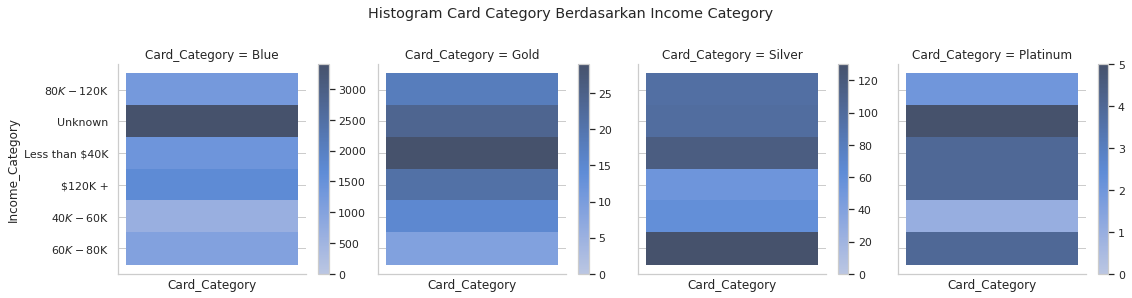

In [ ]:
histogram_income_card_category()

**6. Scatterplot Total Transaksi Dengan Total Pengeluaran Kredit**

Dari scatterplot dibawah, dapat disimpulkan bahwa total transaction count dengan total transaction amount berhubungan cukup kuat dibuktikan dengan bentuk penyebaran data nya membentuk garis diagonal dari kiri bawah ke kanan atas dengan hubungan linier positif. Jika kita mencari korelasi antara 2 variabel tersebut,akan didapatkan nilai 0.81 yang berarti 2 variabel tersebut memang berhubungan cukup kuat.

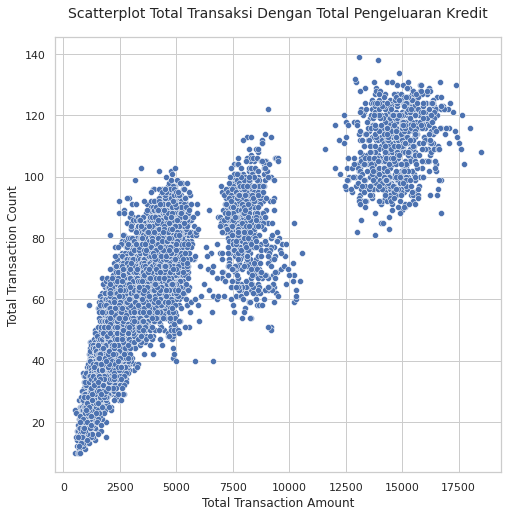

Korelasi :  0.81


In [ ]:
scatterplot_transaction_count_amount()
print("Korelasi : ", round(np.corrcoef(data['Total_Trans_Ct'], data['Total_Trans_Amt'])[1][0], 2))

**7. Scatterplot Umur Dengan Total Transaksi Kredit**

Dari scatterplot di bawah ini, dapat disimpulkan bahwa umur dan total transaksi kredit tidak ada hubungan. Dapat dilihat padah Scatterplot di bawah, kedua variabel (X dan Y) tidak menunjukkan adanya hubungan. Jika kita mencarikorelasi antara 2 variabel tersebut, akan didapatkan nilai -0.039 yang berarti 2 variabel tersebut tidak berhubungan atau sangat lemah. 

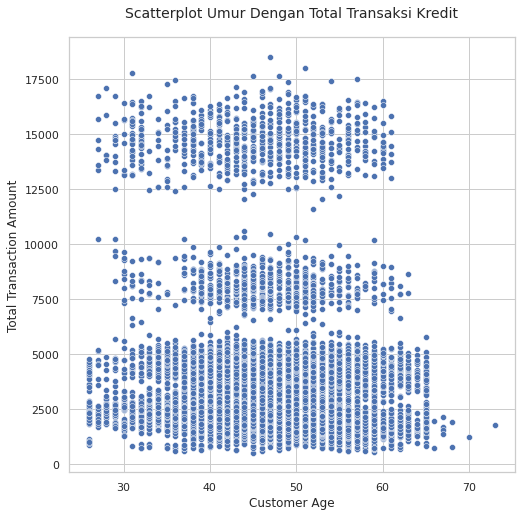

Korelasi :  -0.05


In [ ]:
scatterplot_transaction_amount_age()
print("Korelasi : ", round(np.corrcoef(data['Customer_Age'], data['Total_Trans_Amt'])[1][0], 2))

**8. Barplot Card Category dengan Total Transaction Amount**

Tujuan dari visualisasi diagram batang antara kategori kartu dengan jumlah total transaksi adalah untuk mengetahui kategori kartu user berdasarkan jumlah total transaksi user

**Metode**

Sebelum data divisualisasikan, mencari terlebih dahulu ada berapa kategori kartu yang ada dalam data. Kemudian mengelompokkan jumlah total transaksi berdasarkan kategori kartu dan mencari rata-rata nya. Setelah mendapatkan dua data tersebut yaitu kategori kartu serta jumlah rata-rata total transaksinya, selanjutnya data divisualisasikan pada diagram batang.

Dari diagram batang di bawah dapat disimpulkan bahwa kategori kartu **Platinum** memiliki jumlah rata-rata total transaksi yang paling banyak yaitu 87 dan rata-rata jumlah transaksi paling rendah yaitu kategori kartu **Blue** sebanyak 64

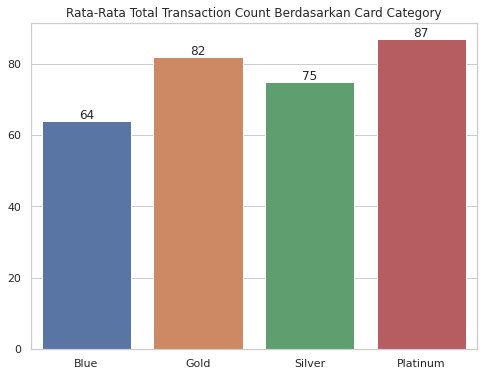

In [ ]:
barplot_category_transaction_count()

**9. Histogram Umur dengan Total Transaksi Kredit**

Tujuan dari membuat histogram Umur dengan Total Transaksi adalah untuk mengetahui seberapa banyak orang pada rentang umur tertentu memiliki total transaksi bulanan sehingga histogram tersebut dapat dijadikan sebagai bahan evaluasi.


Dari histogram di bawah, dapat disimpulkan bahwa:
1. Total Transaksi Kredit paling banyak dimiliki oleh orang dengan rentang usia 44-49 dengan total transaksi kredit 4000-6000 sebanyak 800 orang. 
2. Pada rentang usia 36-53 paling banyak melakukan transaksi kredit dengan Total Transaksi Kredit berkisar dari 2000-5600.
3. Pada rentang usia 68-74 memiliki total transaksi kredit paling sedikit.  


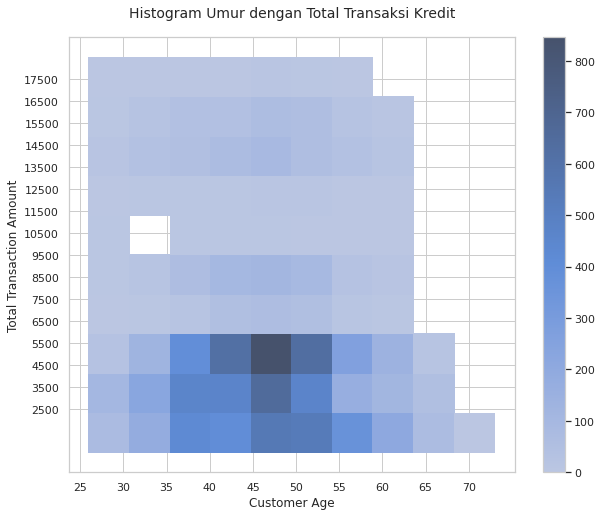

In [ ]:
histogram_transaction_amount_age()

**10. Heatmap Korelasi Keseluruhan Kolom**

Tujuan dari visualisasi korelasi heatmap antar data adalah untuk mengetahui apakah data-data tersebut berkorelasi dengan kuat atau tidak berkorelasi dengan data-data lainnya.


Mengacu pada gambar **Correlation Coefficient** diatas
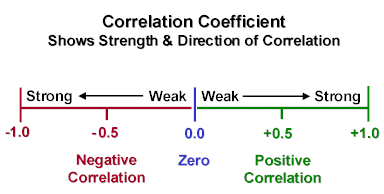

Maka gambar heatmap dibawah dapat disimpulkan bahwa :
1. Total Transaction Amount memiliki korelasi yang sangat kuat terhadap Total Transaction Count dengan nilai korelasi positif sebesar 0.81

2. Customer Age memiliki korelasi yang sangat kuat terhadap Months On Book dengan nilai korelasi positif sebesar 0.79

3. Average Utilization Ratio memiliki korelasi yang kuat terhadap Total Revolving Bal dengan nilai korelasi positif sebesar 0.62

4. Average Open To Buy memiliki korelasi yang kuat terhadap Average Utilization Ratio dengan nilai korelasi negatif sebesar -0.54

5. Credit Limit memiliki korelasi yang cukup kuat terhadap Average Utilization Ratio dengan nilai korelasi negatif sebesar -0.48

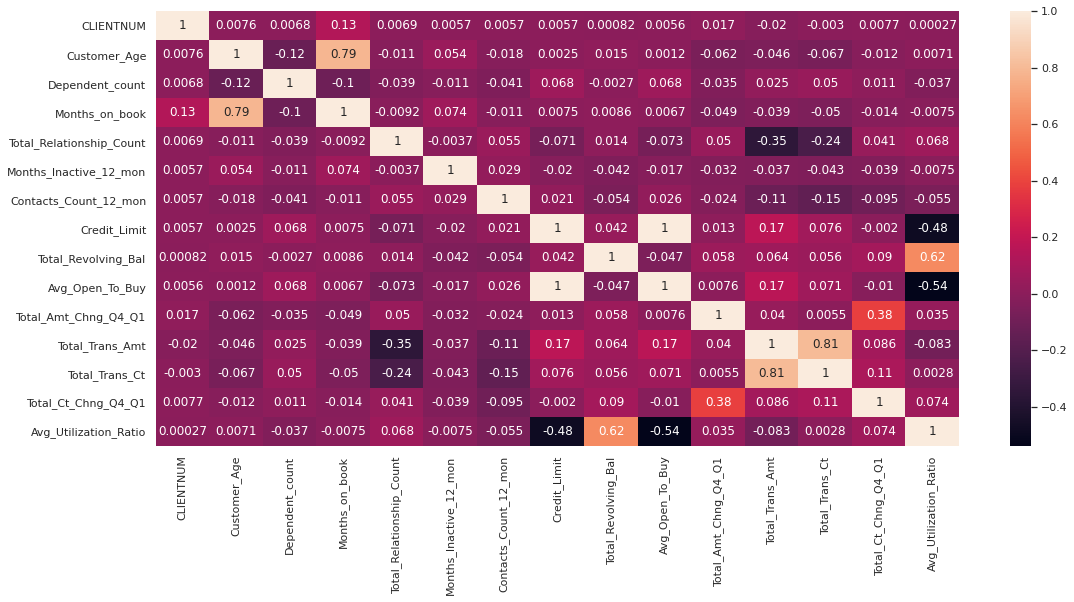

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(data_heatmap.corr(), annot=True)

# **Kesimpulan**

Pada bagian ini kami mengelompokkan pertanyaan-pertanyaan yang akan kami jawab untuk diberikan ke manajer kartu kredit.

**1) Apakah Terdapat Korelasi Antara Umur Dengan Jumlah Transaksi Yang Dilakukan Pengguna ?**

Tidak berhubungan atau sangat lemah dengan korelasi antara 2 variabel tersebut dengan nilai -0.05

<br>

**2) Bagaimana Limit Kredit Yang Dimiliki Masing-Masing Jenis Kategori Kartu ?**

**Boxplot Card Blue:**

a)Distribusi data cenderung menjulur ke arah kanan yang berarti kemiringan dari 
distribusi data pada boxplot card blue bernilai positif.

b)rata-rata Credit Limit paling kecil

c)Penyebaran data paling variatif dengan credit limit berkisar dari 2001-5500

<br>

**Boxplot Card Silver:**

a)Distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card silver bernilai negatif.

b)Penyebaran data dengan credit limit berkisar dari 5000-6000

<br>

**Boxplot Card Gold:**

a)Distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card gold bernilai negatif.

b)Penyebaran data dengan credit limit berkisar dari 5000-7000
 
<br>

**Boxplot Card Platinum:**

a) Distribusi data cenderung menjulur ke arah kiri yang berarti kemiringan dari distribusi data pada boxplot card Platinum bernilai negatif.

b) Rata-rata Credit Limit yang paling besar

c) Penyebaran data dengan credit limit berkisar dari 32000-35000

<br>

**3) Bagaimanakah Tingkat Edukasi Mempengaruhi Jenis Kartu Serta Pelanggan Yang Berhenti Berlangganan Kredit?**

'Graduate' memiliki jumlah pengguna kredit aktif paling banyak dan memiliki jumlah pengguna kredit pasif/tidak aktif paling banyak. 

<br>

**4) Bagaimanakah tingkat transaksi yang dikeluarkan pengguna berdasarkan kategori kartu ?**

Tingkat transaksi user memiliki pengaruh yang signifikan dimana setelah melihat visualisasi data tersebut dapat disimpulkan bahwa kategori kartu 'Platinum' memiliki jumlah rata-rata total transaksi yang paling banyak yaitu 87 dan rata-rata jumlah transaksi paling rendah yaitu kategori kartu 'Blue' sebanyak 64 

<br>

**5) Bagaimanakah Kategori Pemasukan Pengguna Mempengaruhi Jenis Kartu ?**

Kategori pemasukan pengguna memiliki pengaruh yang sangat kuat terhadap jenis kartu, setelah data divisualisasikan dapat dilihat bahwa jumlah pendapatan terbesar terdapat pada kategori kartu 'Blue' dengan kategori pendapatan 'Unknown' sebanyak 3000

<br>

**6) Bagaimanakah Korelasi Antara Jumlah Transaksi Dan Jumlah Kredit Yang Dikeluarkan ?**

Jumlah transaksi memiliki korelasi yang sangat kuat terhadap jumlah kredit yang dikeluarkan dengan nilai korelasi positif sebesar 0.81

<br>

**7. Apakah Umur Mempengaruhi Jumlah Transaksi Kredit ?**

Tentu saja, dapat kita lihat pada lineplot hubungan total transaksi dengan umur, semakin kekanan maka diagram garis mengalami penurunan, yang berarti semakin bertambahnua umur seseorang, maka jumlah transaksi yang dilakukannya akan berkurang

<br>

**8) Bagaimanakah Jenis Kartu Kredit Mempengaruhi Jumlah Transaksi Pengguna ?**

Dapat dilihat dari boxplot kategori kartu dengan jumlah pengeluaran kredit transaksi, bahwa kartu kredit berjenis platinum memiliki mean yang paling tinggi, disusul dengan gold, silver kemudian blue. Seperti yang kita ketahui, platinum merupakan kategori kartu tertinggi, disusul dengan gold, silver dan blue. Sehingga dapat disimpulkan bahwa jenis kartu kredit mempengaruhi jumlah transaksi yang dilakukan oleh customer.

<br>

**9) Bagaimanakah Korelasi Umur Dengan Jumlah Pengeluaran Kredit ?**

Tidak berhubungan atau sangat lemah dengan korelasi antara 2 variabel tersebut dengan nilai -0.05

<br>

**10) Bagaimanakah Pengaruh Total Pengeluaran Terhadap Total Transaksi Pengguna ?**

Jumlah transaksi memiliki korelasi yang sangat kuat terhadap jumlah kredit yang dikeluarkan dengan nilai korelasi positif sebesar 0.81
